# Leaf Area Measuring For No-Controls and Water-Control

This script helps in tracking and visualizing plant growth by analyzing images taken over a period of time. By detecting the green areas in the images, it provides a quantitative measure of growth, which is then visualized through a line plot.

## No-Controls

Image File Name | Plant Area (pixels)
----------------------------------------
01_Morning.jpg       | 12787
02_Morning.jpg       | 15797
03_Morning.jpg       | 13460
04_Evening.jpg       | 12917
04_Morning.jpg       | 19525
05_Evening.jpg       | 11510
05_Morning.jpg       | 25651
06_Evening.jpg       | 36090
06_Morning.jpg       | 30067
07_Evening.jpg       | 34645
07_Morning.jpg       | 33414
08_Evening.jpg       | 8166
08_Morning.jpg       | 43351
09_Evening.jpg       | 33897
09_Morning.jpg       | 39591
10_Evening.jpg       | 37842
10_Morning.jpg       | 39303
11_Evening.jpg       | 33477
11_Morning.jpg       | 47634
12_Evening.jpg       | 101594
12_Morning.jpg       | 48509


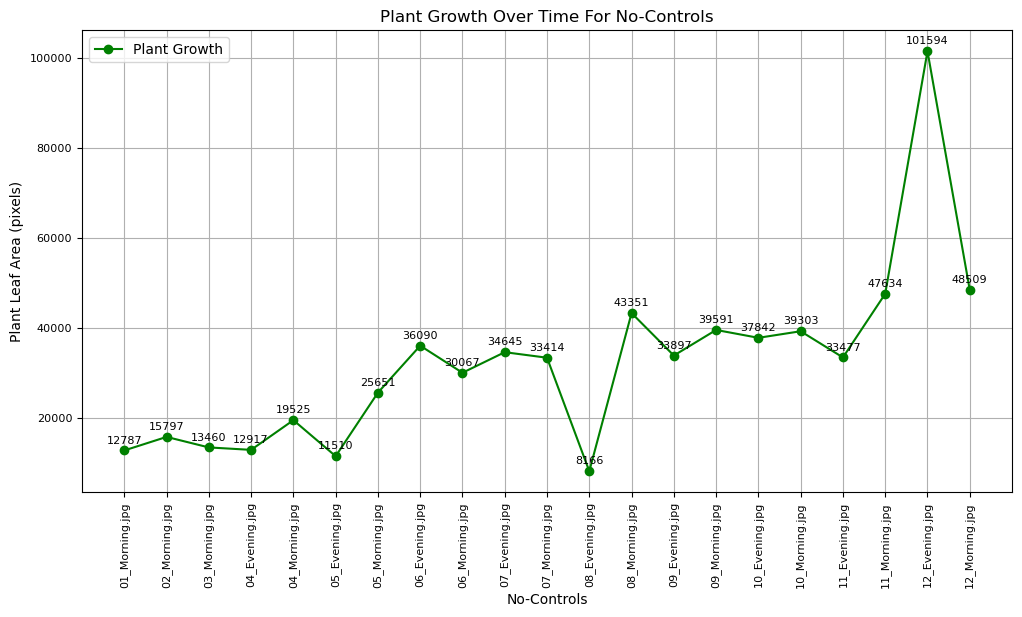

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def measure_growth(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image '{image_path}' not found.")
        return None

    image = cv2.resize(image, (800, 800))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_green = np.array([35, 50, 50]) 
    upper_green = np.array([85, 255, 255])  

    mask = cv2.inRange(hsv, lower_green, upper_green)
    plant_area = cv2.countNonZero(mask)

    return plant_area

def process_folder(folder_path):
    growth_data = {}

    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            plant_area = measure_growth(image_path)
            if plant_area is not None:
                growth_data[filename] = plant_area

    return growth_data

def plot_growth(growth_data):
    filenames = list(growth_data.keys())
    areas = list(growth_data.values())

    plt.figure(figsize=(12, 6))
    plt.plot(filenames, areas, marker='o', linestyle='-', color='g', label="Plant Growth")
    plt.xlabel("No-Controls")
    plt.ylabel("Plant Leaf Area (pixels)")
    plt.title("Plant Growth Over Time For No-Controls")
    plt.xticks(rotation=90, fontsize=8)  # Rotate filenames for readability
    plt.yticks(fontsize=8)
    
    # Display area values above points in the graph
    for i, txt in enumerate(areas):
        plt.annotate(txt, (filenames[i], areas[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

    plt.legend()
    plt.grid()
    plt.show()

folder_path = 'PlantSelected/NoControls'
growth_data = process_folder(folder_path)

if growth_data:
    print("Image File Name | Plant Area (pixels)")
    print("-" * 40)
    for filename, area in growth_data.items():
        print(f"{filename:20} | {area}")

    plot_growth(growth_data)


## Water-Controls

Image File Name | Plant Area (pixels)
----------------------------------------
01_Morning.jpg       | 17921
02_Morning.jpg       | 15245
03_Morning.jpg       | 16386
04_Evening.jpg       | 11736
04_Morning.jpg       | 15431
05_Evening.jpg       | 10315
05_Morning.jpg       | 20829
06_Evening.jpg       | 10814
06_Morning.jpg       | 16381
07_Evening.jpg       | 20174
07_Morning.jpg       | 27109
08_Evening.jpg       | 2775
08_Morning.jpg       | 22131
09_Evening.jpg       | 13674
09_Morning.jpg       | 22442
10_Evening.jpg       | 23821
10_Morning.jpg       | 16302
11_Evening.jpg       | 14156
11_Morning.jpg       | 22629
12_Evening.jpg       | 23006
12_Morning.jpg       | 22027


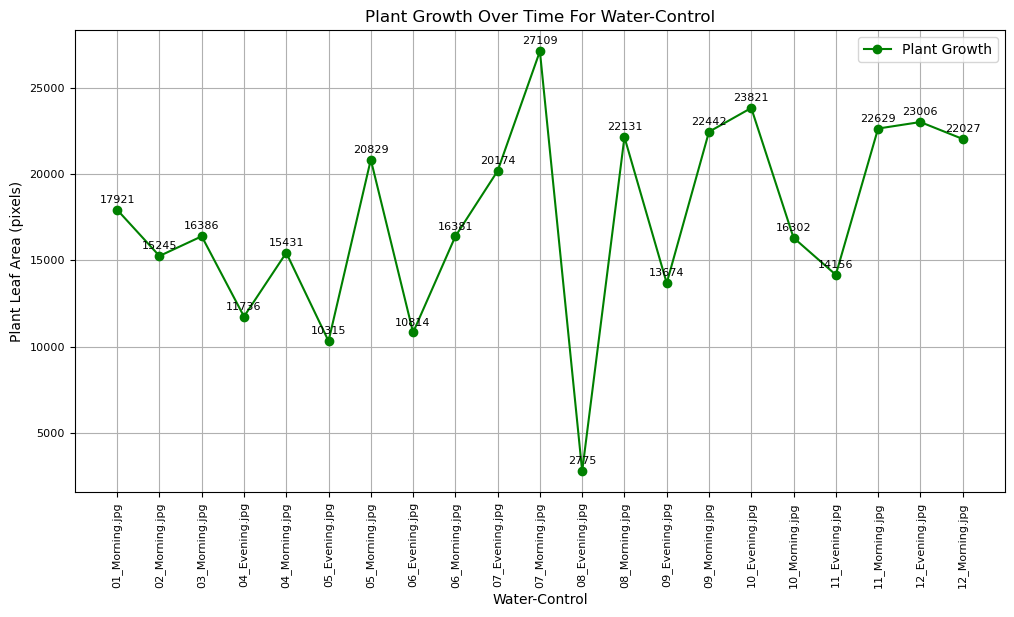

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def measure_growth(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image '{image_path}' not found.")
        return None

    image = cv2.resize(image, (800, 800))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_green = np.array([35, 50, 50]) 
    upper_green = np.array([85, 255, 255])  

    mask = cv2.inRange(hsv, lower_green, upper_green)
    plant_area = cv2.countNonZero(mask)

    return plant_area

def process_folder(folder_path):
    growth_data = {}

    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            plant_area = measure_growth(image_path)
            if plant_area is not None:
                growth_data[filename] = plant_area

    return growth_data

def plot_growth(growth_data):
    filenames = list(growth_data.keys())
    areas = list(growth_data.values())

    plt.figure(figsize=(12, 6))
    plt.plot(filenames, areas, marker='o', linestyle='-', color='g', label="Plant Growth")
    plt.xlabel("Water-Control")
    plt.ylabel("Plant Leaf Area (pixels)")
    plt.title("Plant Growth Over Time For Water-Control")
    plt.xticks(rotation=90, fontsize=8)  # Rotate filenames for readability
    plt.yticks(fontsize=8)
    
    # Display area values above points in the graph
    for i, txt in enumerate(areas):
        plt.annotate(txt, (filenames[i], areas[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

    plt.legend()
    plt.grid()
    plt.show()

folder_path = 'PlantSelected/WaterControls'
growth_data = process_folder(folder_path)

if growth_data:
    print("Image File Name | Plant Area (pixels)")
    print("-" * 40)
    for filename, area in growth_data.items():
        print(f"{filename:20} | {area}")

    plot_growth(growth_data)
